# **Extração e Tratamento dos Dados**

In [1]:
dados = ('/content/drive/MyDrive/Colab Notebooks/dados_tratados.csv')

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np

df = pd.read_csv(dados)
df.head()

,customerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,DailyCharges
0,0002-ORFBO,0,0,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,1,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,1,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,1,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,0,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   int64  
 2   Gender            7267 non-null   int64  
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   Tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   int64  
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   int64  
 11  OnlineBackup      7267 non-null   int64  
 12  DeviceProtection  7267 non-null   int64  
 13  TechSupport       7267 non-null   int64  
 14  StreamingTV       7267 non-null   int64  
 15  StreamingMovies   7267 non-null   int64  
 16  Contract          7267 non-null   object 


Remover colunas não relevantes

In [3]:
df = df.drop(columns=['customerID', 'DailyCharges'])

Proporção de evasão

In [4]:
churn_counts = df['Churn'].value_counts()
print("Contagem de clientes por classe:")
print(churn_counts)

Contagem de clientes por classe:
Churn
0    5398
1    1869
Name: count, dtype: int64


In [5]:
churn_proportions = df['Churn'].value_counts(normalize=True) * 100
print("\nProporção de clientes por classe:")
print(churn_proportions)


Proporção de clientes por classe:
Churn
0    74.280996
1    25.719004
Name: proportion, dtype: float64


Separar variaveis numericas de categoricas

In [6]:
numerical_cols = ['Tenure', 'MonthlyCharges', 'TotalCharges']
categorical_cols = ['InternetService', 'Contract', 'PaymentMethod']
other_cols_to_keep = ['Churn', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

One hot encoding para variaveis categoricas

In [7]:
df_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)

Combinar o data frame

In [8]:
df_final = pd.concat([df[other_cols_to_keep], df[numerical_cols], df_encoded], axis=1)

Padronizar as variaveis numericas

In [9]:
scaler = StandardScaler()
df_final[numerical_cols] = scaler.fit_transform(df_final[numerical_cols])

In [10]:
print("DataFrame Final (pré-modelagem):")
print(df_final.head())

DataFrame Final (pré-modelagem):
   Churn  Gender  SeniorCitizen  Partner  Dependents  PhoneService  \
0      0       0              0        1           1             1   
1      0       1              0        0           0             1   
2      1       1              0        0           0             1   
3      1       1              1        1           0             1   
4      1       0              1        1           0             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0              0               0             1                 0  ...   
1              1               0             0                 0  ...   
2              0               0             0                 1  ...   
3              0               0             1                 1  ...   
4              0               0             0                 0  ...   

     Tenure  MonthlyCharges  TotalCharges  InternetService_Fiber optic  \
0 -0.950200        0.029206     -

Dados treino e teste

In [11]:
X = df_final.drop('Churn', axis=1)
y = df_final['Churn']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
print("\nShape dos conjuntos de dados:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")


Shape dos conjuntos de dados:
X_train: (5813, 23)
X_test: (1454, 23)


Treinamento do Modelo

In [14]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

Avaliação do modelo

In [15]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\n--- Avaliação do Modelo ---")
print(f"Acurácia: {accuracy:.4f}")
print("\nMatriz de Confusão:")
print(conf_matrix)
print("\nRelatório de Classificação:")
print(class_report)


--- Avaliação do Modelo ---
Acurácia: 0.8026

Matriz de Confusão:
[[964 116]
 [171 203]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1080
           1       0.64      0.54      0.59       374

    accuracy                           0.80      1454
   macro avg       0.74      0.72      0.73      1454
weighted avg       0.79      0.80      0.80      1454



Balanceamento de classes

Utilizando SMOTE

In [17]:
from imblearn.over_sampling import SMOTE

In [23]:

X = df_final.drop('Churn', axis=1)
y = df_final['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

model_smote = LogisticRegression(random_state=42, max_iter=2000)
model_smote.fit(X_resampled, y_resampled)

y_pred_smote = model_smote.predict(X_test)

accuracy_smote = accuracy_score(y_test, y_pred_smote)
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
class_report_smote = classification_report(y_test, y_pred_smote)

print("--- Avaliação do Modelo com SMOTE ---")
print(f"Acurácia: {accuracy_smote:.4f}")
print("\nMatriz de Confusão:")
print(conf_matrix_smote)
print("\nRelatório de Classificação:")
print(class_report_smote)

--- Avaliação do Modelo com SMOTE ---
Acurácia: 0.7435

Matriz de Confusão:
[[782 298]
 [ 75 299]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1080
           1       0.50      0.80      0.62       374

    accuracy                           0.74      1454
   macro avg       0.71      0.76      0.71      1454
weighted avg       0.81      0.74      0.76      1454



Normalização ou padronização

Utilizando Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [28]:
y_pred_rf = model_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print("\n--- Avaliação do Modelo Random Forest com SMOTE ---")
print(f"Acurácia: {accuracy_rf:.4f}")
print("\nMatriz de Confusão:")
print(conf_matrix_rf)
print("\nRelatório de Classificação:")
print(class_report_rf)


--- Avaliação do Modelo Random Forest com SMOTE ---
Acurácia: 0.7249

Matriz de Confusão:
[[837 243]
 [157 217]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1080
           1       0.47      0.58      0.52       374

    accuracy                           0.72      1454
   macro avg       0.66      0.68      0.66      1454
weighted avg       0.75      0.72      0.73      1454



Analise de Correlação

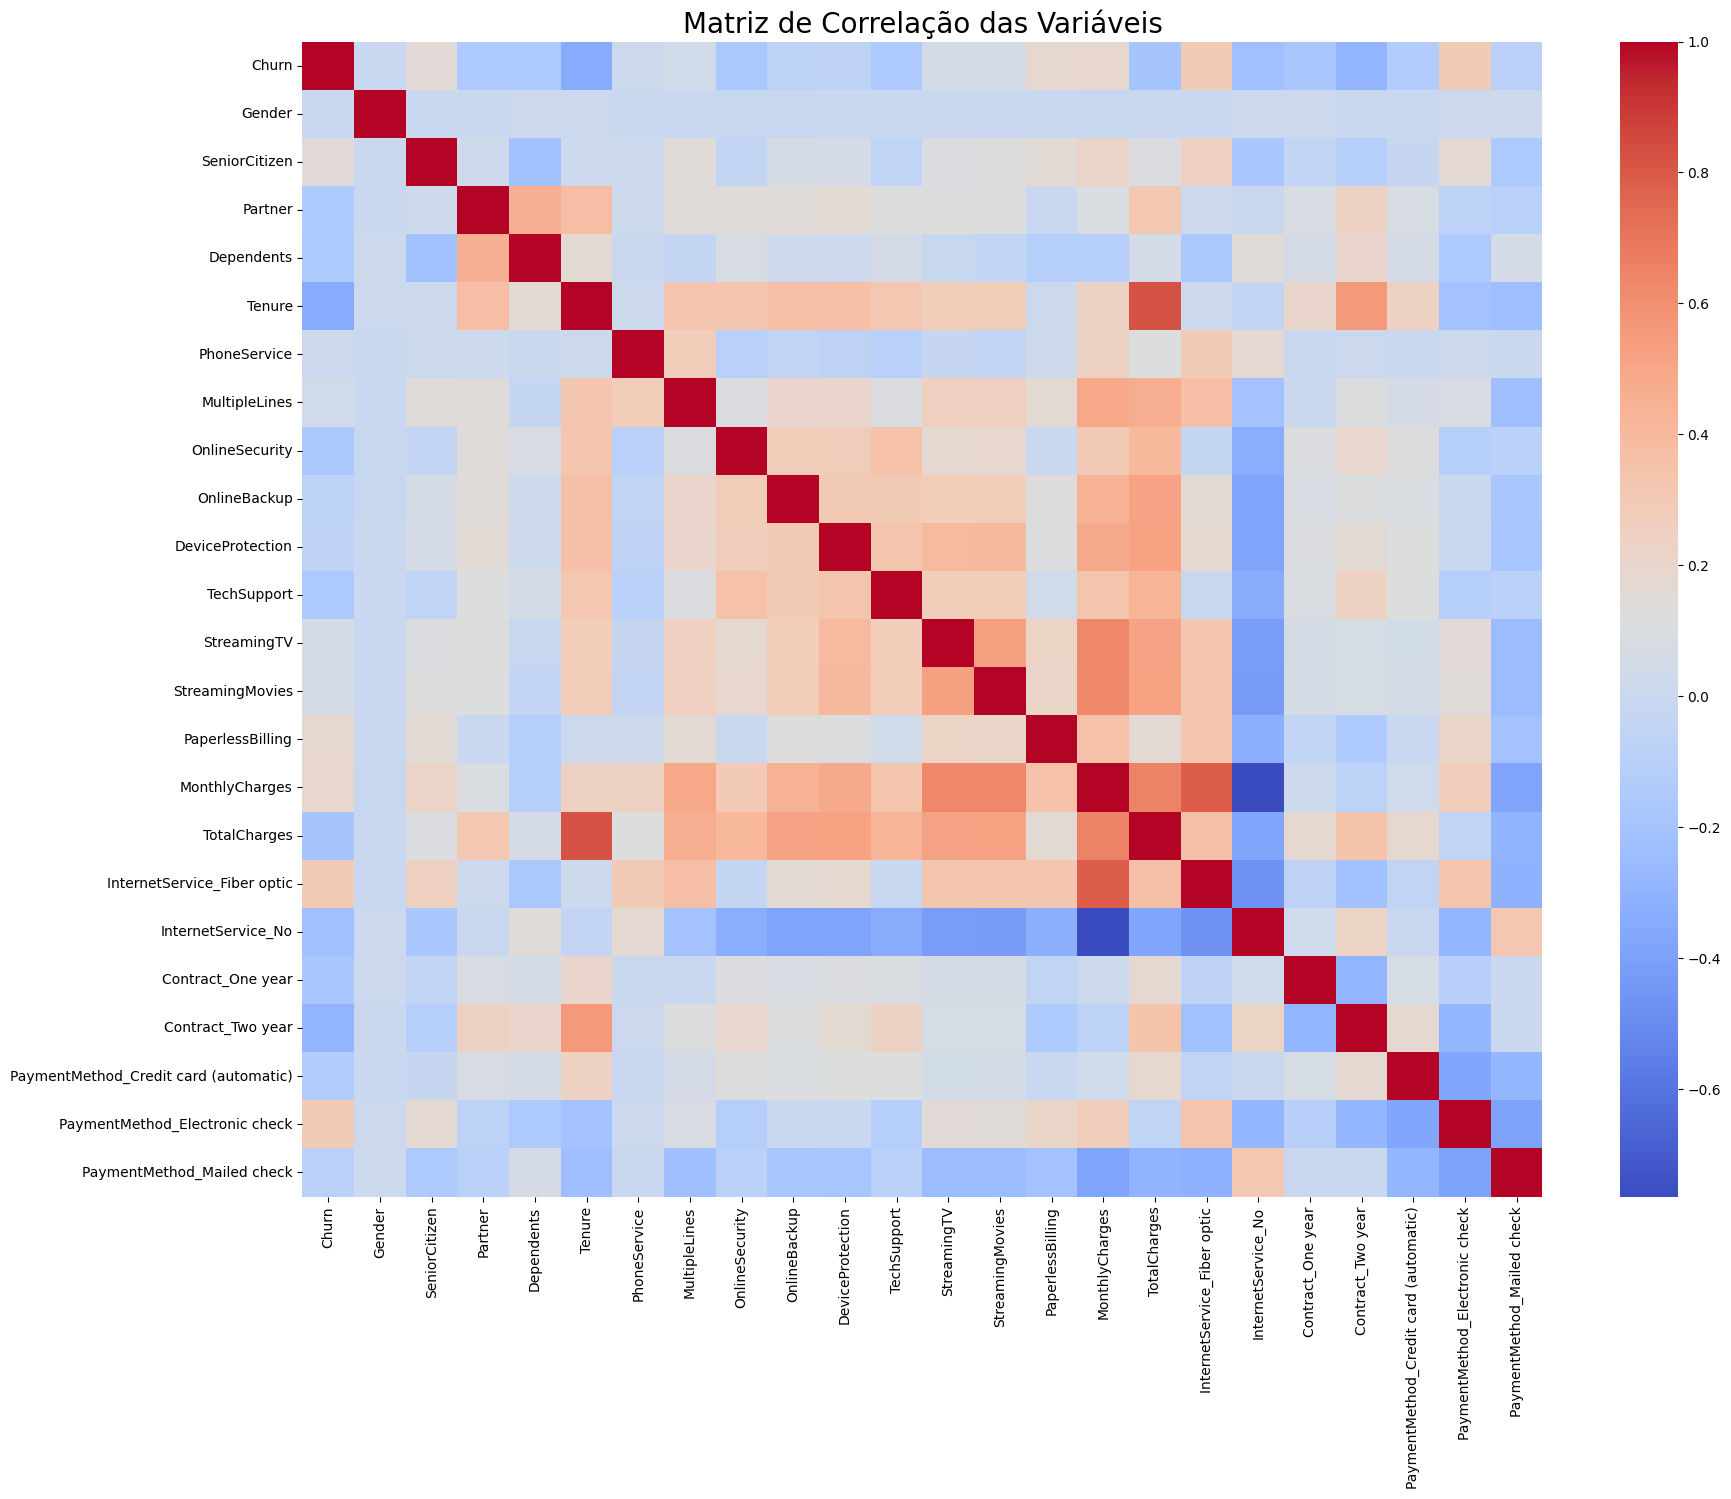

Correlação das variáveis com a evasão (Churn):
Churn                                    1.000000
InternetService_Fiber optic              0.300949
PaymentMethod_Electronic check           0.294626
MonthlyCharges                           0.189866
PaperlessBilling                         0.186666
SeniorCitizen                            0.146733
StreamingTV                              0.062430
StreamingMovies                          0.060586
MultipleLines                            0.039343
PhoneService                             0.012571
Gender                                  -0.009555
DeviceProtection                        -0.063452
OnlineBackup                            -0.080163
PaymentMethod_Mailed check              -0.090061
PaymentMethod_Credit card (automatic)   -0.131085
Partner                                 -0.148546
TechSupport                             -0.160440
Dependents                              -0.161384
OnlineSecurity                          -0.166828
Con

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


df['Gender'] = df['Gender'].astype(int)
df['SeniorCitizen'] = df['SeniorCitizen'].astype(int)
df['Partner'] = df['Partner'].astype(int)
df['Dependents'] = df['Dependents'].astype(int)
df['PhoneService'] = df['PhoneService'].astype(int)
df['MultipleLines'] = df['MultipleLines'].astype(int)
df['OnlineSecurity'] = df['OnlineSecurity'].astype(int)
df['OnlineBackup'] = df['OnlineBackup'].astype(int)
df['DeviceProtection'] = df['DeviceProtection'].astype(int)
df['TechSupport'] = df['TechSupport'].astype(int)
df['StreamingTV'] = df['StreamingTV'].astype(int)
df['StreamingMovies'] = df['StreamingMovies'].astype(int)
df['PaperlessBilling'] = df['PaperlessBilling'].astype(int)


df_corr = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)

correlation_matrix = df_corr.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Variáveis', fontsize=20)
plt.show()


churn_correlations = correlation_matrix['Churn'].sort_values(ascending=False)
print("Correlação das variáveis com a evasão (Churn):")
print(churn_correlations)

Analise Direcionada

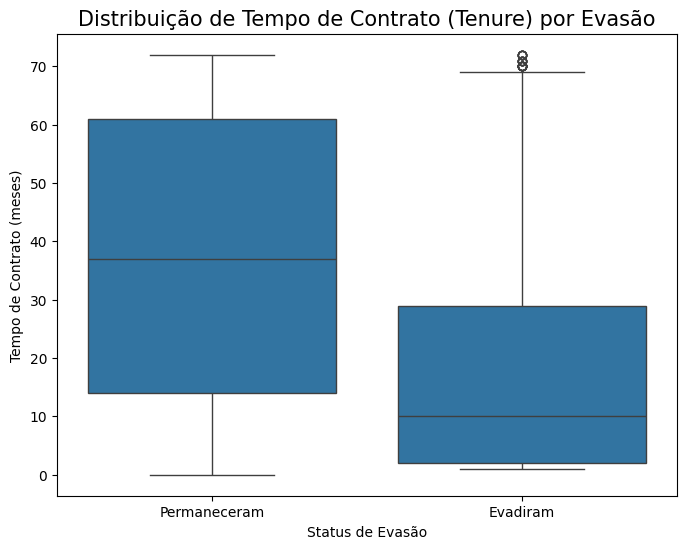

In [33]:
df['Churn_Label'] = df['Churn'].replace({0: 'Permaneceram', 1: 'Evadiram'})

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn_Label', y='Tenure', data=df)
plt.title('Distribuição de Tempo de Contrato (Tenure) por Evasão', fontsize=15)
plt.xlabel('Status de Evasão')
plt.ylabel('Tempo de Contrato (meses)')
plt.show()

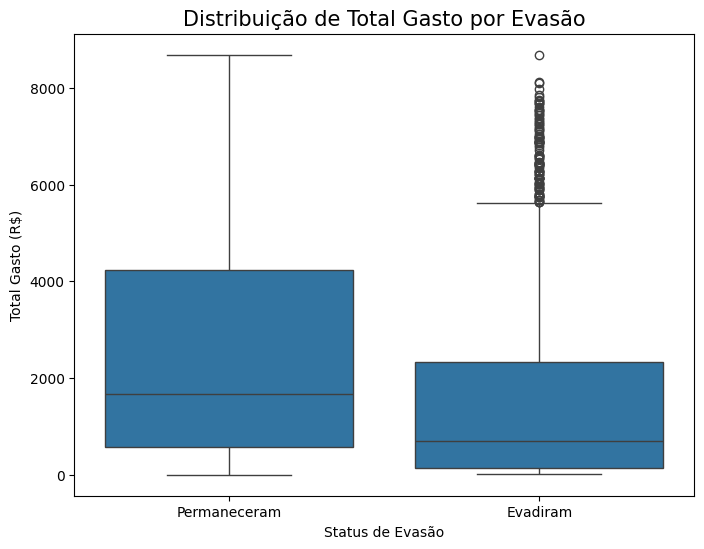

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn_Label', y='TotalCharges', data=df)
plt.title('Distribuição de Total Gasto por Evasão', fontsize=15)
plt.xlabel('Status de Evasão')
plt.ylabel('Total Gasto (R$)')
plt.show()

Modelagem preditiva

In [40]:
from imblearn.pipeline import Pipeline as ImbPipeline



df_dummies = pd.get_dummies(df.drop('Churn', axis=1), drop_first=True)
df_final = pd.concat([df_dummies, df['Churn']], axis=1)
X = df_final.drop('Churn', axis=1)
y = df_final['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Pipeline para Regressão Logística
pipeline_lr = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42, max_iter=2000))
])
pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)
print("--- Avaliação do Modelo de Regressão Logística ---")
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_lr))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_lr))

# Pipeline para Random Forest
pipeline_rf = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)
print("\n--- Avaliação do Modelo Random Forest ---")
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_rf))

# Avaliação de Overfitting (Treino vs. Teste)
y_train_pred_lr = pipeline_lr.predict(X_train)
y_train_pred_rf = pipeline_rf.predict(X_train)

print("\n--- Análise de Overfitting (Acurácia) ---")
print(f"Acurácia (Regressão Logística) - Treino: {accuracy_score(y_train, y_train_pred_lr):.4f}")
print(f"Acurácia (Regressão Logística) - Teste:  {accuracy_score(y_test, y_pred_lr):.4f}")
print("---")
print(f"Acurácia (Random Forest) - Treino: {accuracy_score(y_train, y_train_pred_rf):.4f}")
print(f"Acurácia (Random Forest) - Teste:  {accuracy_score(y_test, y_pred_rf):.4f}")

--- Avaliação do Modelo de Regressão Logística ---
Matriz de Confusão:
[[1080    0]
 [   0  374]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1080
           1       1.00      1.00      1.00       374

    accuracy                           1.00      1454
   macro avg       1.00      1.00      1.00      1454
weighted avg       1.00      1.00      1.00      1454


--- Avaliação do Modelo Random Forest ---
Matriz de Confusão:
[[1080    0]
 [   0  374]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1080
           1       1.00      1.00      1.00       374

    accuracy                           1.00      1454
   macro avg       1.00      1.00      1.00      1454
weighted avg       1.00      1.00      1.00      1454


--- Análise de Overfitting (Acurácia) ---
Acurácia (Regressão Logística) - Treino: 1.0000
Acurácia 